# WHO: Analiza statystyczna wskaźnika samobójstw w latach 1985 - 2016

## 1. Import danych i ich wstępna analiza

Wykorzystany dataset można pobrać pod linkiem: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016.

In [17]:
import pandas as pd

dataframe = pd.read_csv('master.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Niektóre nazwy kolumn mogą być problematyczne, e.g. " gpd_for_year ($)", dlatego należy je zmienić na wygodniejsze.

In [21]:
dataframe=dataframe.rename(columns={'suicides/100k pop': 'suicides_per_100k',
                          'HDI for year': 'hdi_for_year',
                          ' gdp_for_year ($) ':
                          'gdp_for_year',
                          'gdp_per_capita ($)': 'gdp_per_capita'})
dataframe.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country-year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

Przykładowe, losowo wybrane, rekordy z datasetu:

In [22]:
dataframe.sample(5)

,country,year,sex,age,suicides_no,population,suicides_per_100k,country-year,hdi_for_year,gdp_for_year,gdp_per_capita,generation
857,Argentina,2007,female,15-24 years,146,3292790,4.43,Argentina2007,NaN,"287,530,508,431",7918,Millenials
9583,Georgia,2004,female,75+ years,3,139900,2.14,Georgia2004,NaN,"5,125,363,001",1253,Silent
5633,Chile,2015,female,75+ years,21,470618,4.46,Chile2015,NaN,"243,999,477,738",14729,Silent
17786,New Zealand,2013,male,75+ years,26,113910,22.83,New Zealand2013,0.911,"190,785,204,764",46198,Silent
5675,Colombia,1988,male,15-24 years,243,3543715,6.86,Colombia1988,NaN,"39,212,550,050",1369,Generation X


In [35]:
dataframe.describe()

,year,suicides_no,population,suicides_per_100k,hdi_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


## 2. Globalna analiza

Czerwoną przerywaną linią zaznaczona jest średnia ilość samobójstw na 100 tys. mieszkańców.

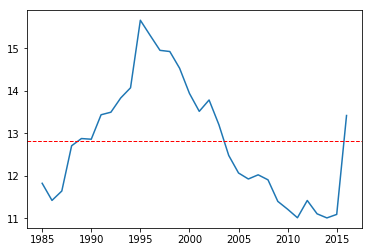

Maximum value: 15.662670940170946
Average value: 12.816323531728212
Minimum value: 11.011463675213678


In [49]:
import matplotlib.pyplot as plt

global_average = dataframe.groupby(['year']).mean().suicides_per_100k
plt.plot(global_average)
plt.axhline(global_average.mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()
print("Maximum value:", global_average.max())
print("Average value:", global_average.mean())
print("Minimum value:", global_average.min())